# Setup

Classic notebook setup

In [1]:
# Automatically reloads modules before executing code.
# This ensures that any changes made to imported Python files (e.g. .py modules) 
# are reflected in the notebook without needing to restart the kernel.

%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import time
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from samplers.rejection_sampler import *

# Rejection Sampler test on a standard normal distribution

In [3]:
def gaussian_pdf(x: np.ndarray, mean: float = 0.0, std: float = 1.0) -> np.ndarray:
    """
    Compute the probability density function (PDF) of a Gaussian (normal) distribution.

    Parameters
    ----------
    x : np.ndarray
        Points at which to evaluate the PDF.
    mean : float, optional
        Mean (μ) of the normal distribution. Default is 0.0.
    std : float, optional
        Standard deviation (σ) of the normal distribution. Must be positive. Default is 1.0.

    Returns
    -------
    np.ndarray
        The PDF values of the Gaussian distribution evaluated at each point in `x`.

    """
    coeff = 1 / (std * np.sqrt(2 * np.pi))
    exponent = -((x - mean) ** 2) / (2 * std ** 2)
    return coeff * np.exp(exponent)

In [4]:
samples, M = rejection_sampling_uniform(gaussian_pdf, -5, 5, 500000, 0, 1)

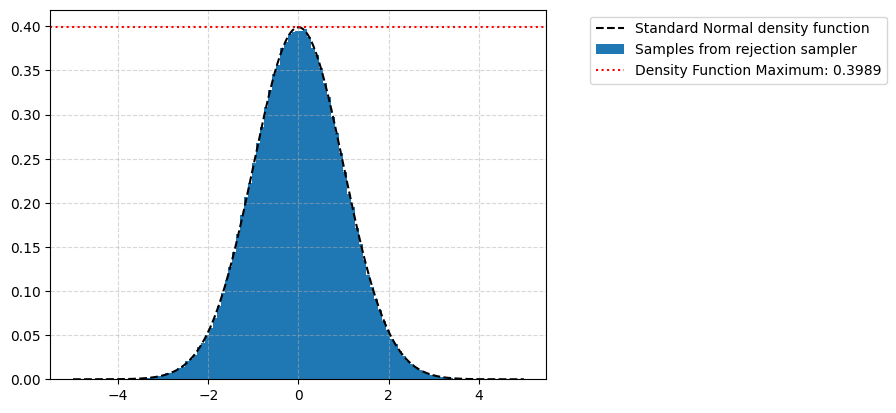

In [21]:
x = np.linspace(-5, 5, 10000)
pdf = gaussian_pdf(x, 0, 1)
plt.plot(x, pdf, color="black", ls="--", label="Standard Normal density function")
plt.hist(samples, bins=100, density=True, label="Samples from rejection sampler")
plt.axhline(M, color="red", ls=":", label=f"Density Function Maximum: {M:.4f}")
plt.grid(ls="--", alpha=0.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.7, 1))
plt.show()

# Sampling a truncated standard normal distribution

In [22]:
xmin, xmax = -2, 2
official_samples = np.random.normal(0, 1, 1000000)
rejection_samples, M = rejection_sampling_uniform(gaussian_pdf, xmin, xmax, 100000, 0, 1)

In [23]:
official_samples = official_samples[(official_samples < xmax) & (official_samples > xmin)]

In [27]:
def truncated_pdf(x):
    return np.where(np.abs(x) <= 2, pdf / (norm.cdf(2) - norm.cdf(-2)), 0)

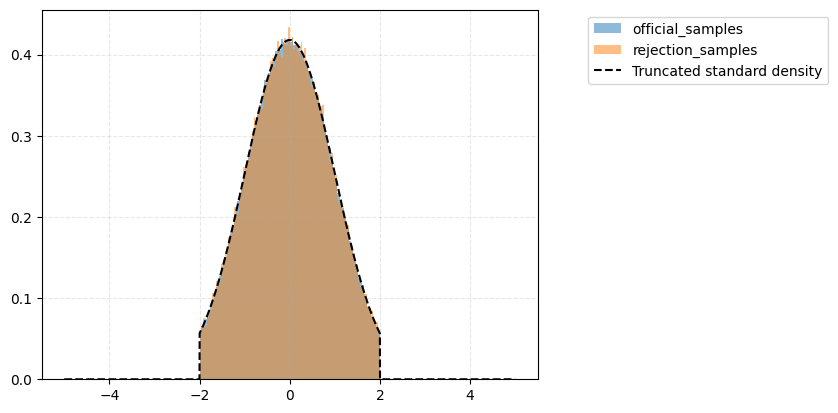

In [34]:
samples = {
    "official_samples": official_samples,
    "rejection_samples": rejection_samples
}

for name, sampl in samples.items():
    plt.hist(sampl, bins=100, density=True, alpha=0.5, label=name)
    
plt.plot(x, truncated_pdf(x), color="black", ls="--", label="Truncated standard density")
plt.grid(ls="--", alpha=0.3)
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1))
plt.show()

La constante de normalisation est la masse totale (la probabilité) de la normale entre −2 et 2 :
a, b = (xmin - mu) / sigma, (xmax - mu) / sigma
#Masse totale sur l’intervalle tronqué
Z = norm.cdf(b) - norm.cdf(a)

Il faut que je fasse ça un peu plus propre avec des dictionnaires des arguments de la gaussienne pour pouvoir adapter la pdf que je trace facilement